# Sect 14: Hypothesis Testing
- online-dtsc-ft-030220 study group
- 04/08/20


# Learning Objectives

- **Describe the steps of the Scientific Method**
    - Describe $H_0$ vs $H_1$
    - Describe $\alpha$ threshold and $p$ values.
    - Describe Type I vs Type II errors


- **Use my neuroscience research poster as an example of experimental design.**
    - Control vs Experimental Groups
    - Touch on T-Tests vs ANOVAs 
    - Touch on One-Way ANOVA vs One-Way Repeated Measures ANOVA
    - Develop an appreciation for *not* having to collect the data ourselves. 

- **Discuss T-Tests and their Assumptions**

- **Activity: Hypothesis Testing Project - Q1**

## Resources
- [Google Drive Folder for Section 20](https://drive.google.com/drive/folders/1a9AEWgeaU4fthzHGaN5Y8fQ-AuIgye6z?usp=sharing)
    - [CodeAcademy Slides](https://drive.google.com/file/d/1aSoAyGifa6elhs5lQDeSkfOow5lDVfzW/view?usp=sharing)
    - [James' Neuroscience Research Poster](https://drive.google.com/open?id=14z2dUdPB_8ei3HA7R1j3ylwEP0kVZhJq)


## Questions/Topics:
- 



# The Scientific Method

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-experimental-design-onl01-dtsc-ft-030220/master/images/new_the-scientific-method.png">

## Foundations of a Sound Experiment

- **Control Group/Random Controlled Trials**

- **If humans are administering the experiment and/or grading/recording observations** about the groups, we should ideally use a **double blind** design (though single blind is better than nothing).

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-experimental-design-online-ds-pt-100719/master/images/new_double_blind.png" width=60%>

- **Sampling Techniques:**
    - Sampling is independent
    - Sample is collected randomly
    - Sample is approximately normally distributed
    - Appropriate sample size
    
- **Reproducibility**

# P-Values & Null Hypotheses

**_Null Hypothesis_**: There is no relationship between A and B   
Example: "There is no relationship between this flu medication and a reduced recovery time from the flu".

The _Null Hypothesis_ is usually denoted as $H_{0}$

**_Alternative Hypothesis_**: The hypothesis traditionally thought of when creating a hypothesis for an experiment  
Example: "This flu medication reduces recovery time for the flu."

The _Alternative Hypothesis_ is usually denoted as $H_{1}$


> **The one-sample $z$-test is used only for tests related to the sample mean.** 
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-z-score-p-value-online-ds-pt-100719/master/images/pvalue.png" width=70%>


<!---<img src="https://raw.githubusercontent.com/jirvingphd/dsc-z-score-p-value-online-ds-ft-100719/master/images/cumprob2.png" width=400--->


> **Alpha ($\alpha$):** is the probability of a Type I error i.e. finding a difference when a difference does not exist. 

> Most medical literature uses an alpha cut-off of 5% (0.05), indicating a 5% chance that a significant difference is actually due to chance and is not a true difference. 

> **Beta ($\beta$):** is the probability of a Type II error i.e. not detecting a difference when one actually exists. 

> Beta is directly related to study power (Power = $1 - \beta$) which you will investigate further in the next lesson. Most medical literature uses a beta cut-off of 20% (0.2), indicating a 20% chance that a significant difference is missed. 

$\alpha$ **_(alpha)_**: The marginal threshold at which you're okay with rejecting the null hypothesis. 


> If you set an alpha value of $\alpha = 0.05$, you're essentially saying "I'm okay with accepting my alternative hypothesis as true if there is less than a 5% chance that the results that I'm seeing are actually due to randomness."

In simple terms:

$p < \alpha$: Reject the _Null Hypothesis_ and accept the _Alternative Hypothesis_

$p >= \alpha$: Fail to reject the _Null Hypothesis_.  

**_p-value_**: The probability of observing a test statistic at least as large as the one observed, by random chance, assuming that the null hypothesis is true.

If you calculate a p-value and it comes out to 0.03, you can interpret this as saying "There is a 3% chance of obtaining the results I'm seeing when the null hypothesis is true."  



> **_Example One-Tail Hypothesis_**

$H_{1} : \mu_1 < \mu_2 $ The treatment group given this weight loss drug will lose more weight on average than the control group that was given a competitor's weight loss drug 

$ H_{0} : \mu1 >= \mu_2$  The treatment group given this weight loss drug will not lose more weight on average than the control group that was given a competitor's weight loss drug". 

> A **_Two-Tail Test_** is for when you want to test if a parameter falls between (or outside of) a range of two given values. 

**_Example Two-Tail Hypothesis_**

$H_{1} : \mu_1 \neq \mu_2$ "People in the experimental group that are administered this drug will not lose the same amount of weight as the people in the control group.  They will be heavier or lighter". 

$H_{0} : \mu_1 = \mu_2$ "People in the experimental group that are administered this drug will lose the same amount of weight as the people in the control group." 


# Revisiting the Normal Distribution

In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.7.20 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


## Normal Distribution

> **The Normal Distribution is symmetrical and its mean, median and mode are equal.** 
* area under curve is equal to 1.0
* denser in the center and less dense in the tails
* defined by two parameters, the mean ($\mu$) and the standard deviation ($\sigma$).
    

<center><img src="https://raw.githubusercontent.com/jirvingphd/dsc-normal-distribution-online-ds-ft-100719/master/images/normal_sd_new.png" width=600></center>


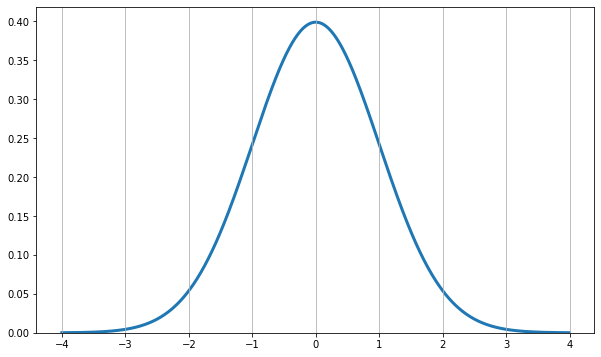

In [2]:
import scipy.stats as stats
x = np.arange(-4,4,.01)
y = stats.norm.pdf(x)

fig,ax = plt.subplots(figsize=(10,6),nrows=1)

ax.plot(x,y,zorder=-1,lw=3)
ax.set_ylim(0)
ax.grid(which='major',axis='x')

In [3]:
# ## Prove percentage rules - 
cdf_1SD = round(stats.norm.cdf(1) - stats.norm.cdf(-1),3)
cdf_3SD = round(stats.norm.cdf(2) - stats.norm.cdf(-2),3)
print(cdf_1SD,cdf_3SD)
# plot_kws= {'ha':'center','backgroundcolor':'white',
#            'bbox': dict(boxstyle="round", fc="0.8")}
# ax.annotate(str(z1),(-1,.1),**plot_kws)

# fig

0.683 0.954


## Standardized Normal Distribution

- Special case of the normal distribution where $\mu=0$ and $\sigma=1$

In [4]:
dfh = fs.datasets.load_height_weight()
dfh.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## Z-Scores

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c23cd64a8>,
      dtype=object)

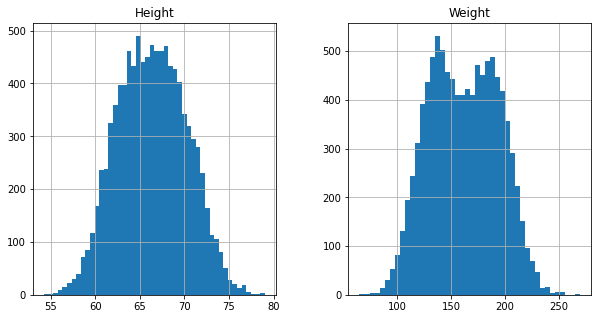

In [5]:
dfh.hist(bins='auto',figsize=(10,5))

#### Z-score

The standard score (more commonly referred to as a $z$-score) is a very useful statistic because it allows us to:
1. Calculate the probability of a certain score occurring within a given normal distribution and 
2. Compare two scores that are from different normal distributions.

Any normal distribution can be converted to a standard normal distribution and vice versa using this
equation:

$$\Large z=\frac{x-\mu}{\sigma}$$

- where $x$ is an individual data point
- $\mu$ is the mean
- $\sigma$ is the standard deviation

In [6]:
dfh['HeightZ'] = (dfh["Height"] - dfh['Height'].mean())/ dfh['Height'].std()
dfh['WeightZ'] = (dfh["Weight"] - dfh['Weight'].mean()) /dfh['Weight'].std()


//anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning:


The colNum attribute was deprecated i

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c23ca8b00>,
      dtype=object)

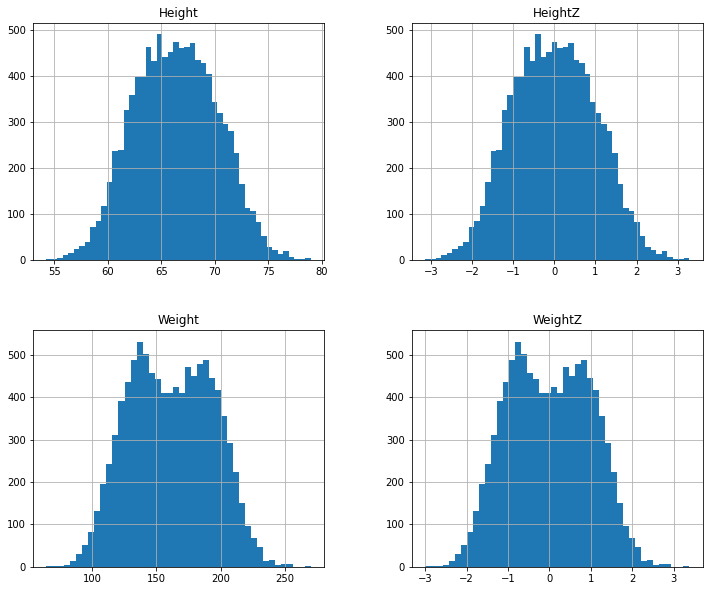

In [7]:
dfh.hist(figsize=(12,10),bins='auto')

## Z-Scoring does not affect the data distribution, just standardizes units

# Statistical Testing with Z-scores and p-values

- Once data is standardized, can start answering questions about population membership usint $Z$-Tests

### Population vs Sample
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-z-score-p-value-online-ds-ft-100719/master/images/sample.png" width=40%>


>A **population** is the collection of **all the items of interest in a study**. The numbers you obtain when using a population are called **parameters**.

> A **sample** is a **subset of the population**. The numbers you obtain when working with a sample are called **statistics**.



## What Are Hypotheses ?

- Null Hypothesis: $H_0$ there is no relationship / the samples come from the same population.

- Alternative: $H_A$/$H_1$ there is a relationship / the samples DO NOT come from same distribution


 ### $\large \alpha$= 0.05


- What does it mean?
    - cutoff for judging whether our sample is "significantly" different than the population.
    - % chance that you would observe this sample from your population dataset





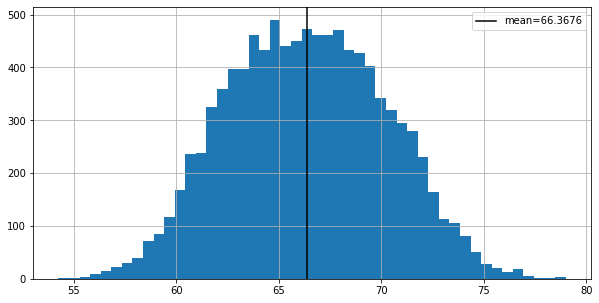

In [8]:
ax = dfh['Height'].hist(bins='auto',figsize=(10,5))
meanH = dfh['Height'].mean()
stdH = dfh["Height"].std()

ax.axvline(meanH,c='k',label=f"mean={round(dfh['Height'].mean(),4)}")
ax.legend()
fig =ax.get_figure()

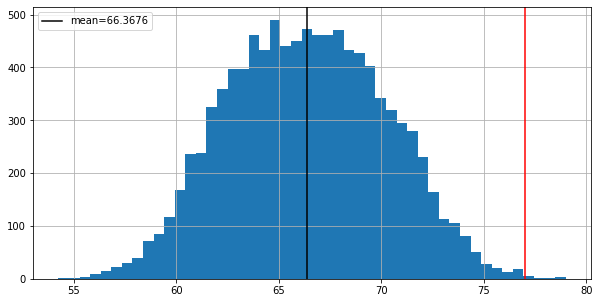

In [9]:
potential_alien_lifeform = 77#height
ax.axvline(potential_alien_lifeform,color='red')
fig

### One-Sample $z$-test

> **The one-sample $z$-test is used only for tests related to the sample mean.** 
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-z-score-p-value-online-ds-pt-100719/master/images/pvalue.png" width=70%>


<!---<img src="https://raw.githubusercontent.com/jirvingphd/dsc-z-score-p-value-online-ds-ft-100719/master/images/cumprob2.png" width=400--->

H0 =  The lifeform's height comes from the human population. 

H1 = The lifesform's height is significantly different than humans. (its from another population).

In [10]:
dfh['HeightZ'] = (dfh["Height"] - dfh['Height'].mean())/ dfh['Height'].std()
z_alien = (potential_alien_lifeform - meanH) /stdH
z_alien

2.7634470526084107

In [11]:
from scipy import stats
alpha=0.05
1 - stats.norm.cdf(z_alien)

0.0028597185423705485



| Set     | $H_0   $    | $H_a$ | Tails |
|---------|-------|-------|-------|
|<img width=30/>|<img width=100/>|<img width=100/>|<img width=50/>|
| 1  | $\mu= M $ |$\mu \neq M $ | 2  | 
| 2  | $\mu \geq M $ |$\mu < M $ | 1  | 
| 3  | $\mu \leq M $ |$\mu > M $ | 1  | 


## Effect Size

- Effect size is assessing how strong the significant difference.
- Cohen's d is unit-agnostic and easy to interpret.

Small effect = 0.2

Medium Effect = 0.5

Large Effect = 0.8


```python
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d
```

# Real-World Science / Experimental Design

- [James' Neuroscience Research Poster: Society for Neuroscience 2016](https://drive.google.com/open?id=14z2dUdPB_8ei3HA7R1j3ylwEP0kVZhJq)

## The Role of Stress Neurons in the Amygdala in Addiction/Binge Drinking

- We will be talking through some of the experiments from my Postdoctoral research on the roll of stress neurons in the escalation of binge drinking.


### The Opponent-Process Theory of Addiction 


<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/robinson-berridge-fig1.jpg">

## Hypothesis 

- Based on prior evidence in the field, stress neurons in the amygdala are believed to be responsible for the negative emotions that promote binge consumption to relieve negative symptoms

$ H_1$: Increasing the activity of stress neurons (CRF neurons) in the amygdala will increase the amount of alcohol consumed by binge-drinking mice.

$H_0$: Stimulation of CRF neurons has no effect on the amount of alcohol consumed.

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/jmi_poster_preds1.png" width=60%>

## Experimental Design

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/opto_6steps.jpg">

<img src="https://raw.githubusercontent.com/jirvingphd/hypothesis_testing_lessons/master/images/jmi_poster_fig1_no_mouse.png">

<!---
<img src="https://raw.githubusercontent.com/jirvingphd/hypothesis_testing_lessons/master/images/jmi_poster_fig1.png">--->

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/jmi_poster_fig2.png">

# 💻 Hypothesis Testing with T-Tests: Activity

In [12]:
# import os,glob
folder = r'Hypothesis Testing Project/'
# display(os.listdir(folder))

In [13]:
## Run this code to see the project readme
from IPython.display import Markdown
with open( folder+'README.md','r') as file:
    display(Markdown(file.read()))


# Module 3 -  Final Project Specifications

## Introduction

In this lesson, we'll review all the guidelines and specifications for the final project for Module 3.

## Objectives

* Understand all required aspects of the Final Project for Module 3
* Understand all required deliverables
* Understand what constitutes a successful project

### Final Project Summary

Another module down--you're half way there!

<img src='https://raw.githubusercontent.com/learn-co-curriculum/dsc-mod-3-project/master/halfway-there.gif'>

For the culmination of Module 3, you just need to complete the final project!

### The Project

For this project, you'll be working with the Northwind database--a free, open-source dataset created by Microsoft containing data from a fictional company. You probably remember the Northwind database from our section on Advanced SQL. Here's the schema for the Northwind database:

<img src='https://raw.githubusercontent.com/learn-co-curriculum/dsc-mod-3-project/master/Northwind_ERD_updated.png'>

The goal of this project is to test your ability to gather information from a real-world database and use your knowledge of statistical analysis and hypothesis testing to generate analytical insights that can be of value to the company.

## The Deliverables

The goal of your project is to query the database to get the data needed to perform a statistical analysis.  In this statistical analysis, you'll need to perform a hypothesis test (or perhaps several) to answer the following question:

**_Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?_**

In addition to answering this question with a hypothesis test, you will also need to come up with **_at least 3 other hypotheses to test on your own_**.  These can by anything that you think could be imporant information for the company.

For this hypothesis, be sure to specify both the **_null hypothesis_** and the **_alternative hypothesis_** for your question.  You should also specify if this is one-tail or a two-tail test.

For online students, there will be four deliverables for this project:

1. A **_Jupyter Notebook_** containing any code you've written for this project. This work will need to be pushed to your GitHub repository in order to submit your project.
2. An organized **README.md** file in the GitHub repository that describes the contents of the repository. This file should be the source of information for navigating through the repository.
3. A **_[Blog Post](https://github.com/learn-co-curriculum/dsc-welcome-blogging)_**.
4. An **_"Executive Summary" PowerPoint Presentation_** that explains the hypothesis tests you ran, your findings, and their relevance to company stakeholders.  

Note: On-campus students may have different delivarables, please speak with your instructor. 

### Jupyter Notebook Must-Haves

For this project, your Jupyter Notebook should meet the following specifications:

**_Organization/Code Cleanliness_**

* The notebook should be well organized, easy to follow, and code is commented where appropriate.  
<br>  
    * Level Up: The notebook contains well-formatted, professional looking markdown cells explaining any substantial code. All functions have docstrings that act as professional-quality documentation.  
<br>      
* The notebook is written to technical audiences with a way to both understand your approach and reproduce your results. The target audience for this deliverable is other data scientists looking to validate your findings.  
<br>    
* Any SQL code written to source data should also be included.  

**_Findings_**

* Your notebook should clearly show how you arrived at your results for each hypothesis test, including how you calculated your p-values.   
<br>
* You should also include any other statistics that you find relevant to your analysis, such as effect size.

### Blog Post Must-Haves

Refer back to the [Blogging Guidelines](https://github.com/learn-co-curriculum/dsc-welcome-blogging) for the technical requirements and blog ideas.


### Executive Summary Must-Haves

Your presentation should:

* Contain between 5-10 professional quality slides detailing:
<br>  
    * A high-level overview of your methodology  
    <br>  
    * The results of your hypothesis tests  
    <br>  
    * Any real-world recommendations you would like to make based on your findings (ask yourself--why should the executive team care about what you found? How can your findings help the company?)  
    <br>  
* Take no more than 5 minutes to present  
<br>  
* Avoid technical jargon and explain results in a clear, actionable way for non-technical audiences.  

## Grading Rubric 

Online students can find a PDF of the grading rubric for this project [here](https://github.com/learn-co-curriculum/dsc-mod-3-project/blob/master/module3_project_rubric.pdf). _Note: On-campus students may have different requirements, please speak with your instructor._


In [14]:
from fsds_100719.imports import *
# import warnings
# warnings.filterwarnings('ignore')
import sqlite3
connect = sqlite3.connect('Northwind_small.sqlite')
cur = connect.cursor()

In [15]:
## To see all tables
cur.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
df_tables = pd.DataFrame(cur.fetchall(), columns=['Table'])
df_tables

,Table
0,Employee
1,Category
2,Customer
3,Shipper
4,Supplier
5,Order
6,Product
7,OrderDetail
8,CustomerCustomerDemo
9,CustomerDemographic


## Hypothesis 1

> Does discount amount have a statistically significant effect on the quantity of a product in an order?(Today)
?> If so, at what level(s) of discount? (will revisit post sect 15)

- $H_0$ Discount has no effect on the average Quantity ordered.
- $H_A$: Discount has an effect on the average Quantity 

In [16]:
data = cur.execute("""SELECT * FROM OrderDetail""").fetchall()
cur.description

(('Id', None, None, None, None, None, None),
 ('OrderId', None, None, None, None, None, None),
 ('ProductId', None, None, None, None, None, None),
 ('UnitPrice', None, None, None, None, None, None),
 ('Quantity', None, None, None, None, None, None),
 ('Discount', None, None, None, None, None, None))

In [17]:
df = pd.DataFrame(data, columns=[x[0] for x in cur.description])
df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.00,12,0.00
1,10248/42,10248,42,9.80,10,0.00
2,10248/72,10248,72,34.80,5,0.00
3,10249/14,10249,14,18.60,9,0.00
4,10249/51,10249,51,42.40,40,0.00
...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03
2151,11077/66,11077,66,17.00,1,0.00
2152,11077/73,11077,73,15.00,2,0.01
2153,11077/75,11077,75,7.75,4,0.00


In [18]:
df['discounted'] = (df['Discount']>0).map({True: "Discounted",False:'Full Price'})
df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,discounted
0,10248/11,10248,11,14.00,12,0.00,Full Price
1,10248/42,10248,42,9.80,10,0.00,Full Price
2,10248/72,10248,72,34.80,5,0.00,Full Price
3,10249/14,10249,14,18.60,9,0.00,Full Price
4,10249/51,10249,51,42.40,40,0.00,Full Price
...,...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03,Discounted
2151,11077/66,11077,66,17.00,1,0.00,Full Price
2152,11077/73,11077,73,15.00,2,0.01,Discounted
2153,11077/75,11077,75,7.75,4,0.00,Full Price


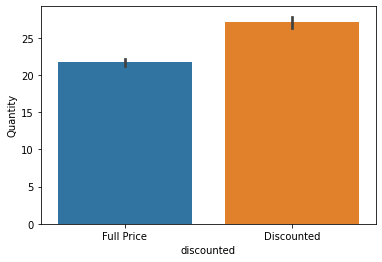

In [19]:
sns.barplot(data=df, x='discounted',y='Quantity',ci=68)#,hue='discounted')

In [20]:
grps = df.groupby('discounted').groups
grps.keys()

dict_keys(['Discounted', 'Full Price'])

In [21]:
data = {}
for grp_name in grps.keys():
    data[grp_name] = df.groupby('discounted').get_group(grp_name)['Quantity']
data.keys()

dict_keys(['Discounted', 'Full Price'])

In [22]:
data['Discounted']

6       35
7       15
8        6
9       15
11      40
        ..
2144     2
2146     3
2149     2
2150     2
2152     2
Name: Quantity, Length: 838, dtype: int64

In [23]:
# ## test for normality
# from scipy.stats import normaltest
# for grp_name, grp_data  in data.items():
#     stat,p = normaltest(grp_data)
#     if p<.05:
#         result = 'NOT normal'

#     else:
#         result = 'normal'
        
#     print(f"Discount group {grp_name} (n={len(grp_data)}) is {result}.")
#     print(f"   - Normaltest Result: {round(stat,4)}, p={round(p,4)}",end='\n\n')    

In [24]:
# from scipy.stats import levene
# levene(*data.values())

In [25]:
from scipy.stats import ttest_ind
help(ttest_ind)

Help on function ttest_ind in module scipy.stats.stats:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which does not assume equal
        population variance [2]_.
    
   

In [26]:
stat,p = ttest_ind(*data.values())
round(p,5)

0.0

# APPENDIX

## Effect Size Visual
- https://rpsychologist.com/d3/NHST/


## Ephys Figure
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/jmi_fig1.png">